# Contents List

## 01. Importing Libraries¶
## 02. Creating a Path¶
## 03. Importing Data
## 04. Data wrangling
### 04.1. LEO
### 04.2. GEO
## 05. Time Series Analysis - Decomposition
### 05.1. LEO Satellites - Observations
### 05.2. GEO Satellites - Observations
## 06. Data Stationary Check
### Observations -  LEO and GEO Satellites
## 07. Data Autocorrelations Check
### Observations -  LEO and GEO Satellites

# 01. Importing Libraries

In [3]:
import quandl
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import os
import statsmodels.api as sm 
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

# 02. Creating a Path

In [5]:
#Create a path
path = r'/Users/aya/Desktop/DataAnalytics/Data-Immersion/Achievement-6/UCS-Satellite-Analysis'

In [6]:
path

'/Users/aya/Desktop/DataAnalytics/Data-Immersion/Achievement-6/UCS-Satellite-Analysis'

# 03. Importing Data

In [8]:
#Import the cleaned Dataset --LEO
df_LEO = pd.read_csv(os.path.join(path, '02-Data', 'Prepared-Data', 'df_LEO.csv'), index_col=0)

In [9]:
#Import the cleaned Dataset --GEO
df_GEO = pd.read_csv(os.path.join(path, '02-Data', 'Prepared-Data', 'df_GEO.csv'), index_col=0)

# 04. Data wrangling

## 04.1. LEO

In [12]:
#Check the dimensions  
df_LEO.shape

(6404, 23)

In [13]:
#Check the data dataframe 
df_LEO.head(3)

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,...,Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month,Launch Mass Categories,Expected Lifetime Categories,Period Categories
0,2019-089H,1HOPSAT-TD (1st-generation High Optical Perfor...,United States of America,Hera Systems,United States of America,Hera Systems,Commercial,Earth Observation,Infrared Imaging,LEO,...,22.0,NaN,NaN,Satish Dhawan Space Centre,PSLV,2019,12,Light Weight Satellites,Short Expected Lifetime,Fast Rotation Period
2,2017-036L,Aalto-1,Finland,Aalto University,Finland,Aalto University,Civil,Technology Development,NaN,LEO,...,4.5,NaN,4.5,Satish Dhawan Space Centre,PSLV,2017,6,Light Weight Satellites,Short Expected Lifetime,Fast Rotation Period
3,2016-025E,AAt-4,Denmark,University of Aalborg,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,...,1.0,NaN,NaN,Guiana Space Center,Soyuz-2.1a,2016,4,Light Weight Satellites,Medium Expected Lifetime,Fast Rotation Period


In [14]:
#Check for duplicates
df_LEO[df_LEO.duplicated()]

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,...,Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month,Launch Mass Categories,Expected Lifetime Categories,Period Categories


In [15]:
#Check for missing values
df_LEO.isnull().sum()

ID Number COSPAR                   0
Satellite Name                     0
Country of Operator/Owner          0
Operator/Owner                     0
Country of Contractor              0
Contractor                         0
Users                              0
Purpose                            0
Detailed Purpose                5465
Class of Orbit                     0
Type of Orbit                     13
Period (minutes)                   0
Expected Lifetime (yrs.)           0
Launch Mass (kg.)                  0
Dry Mass (kg.)                  6036
Power (watts)                   6251
Launch Site                        0
Launch Vehicle                     0
Launch Year                        0
Launch Month                       0
Launch Mass Categories             0
Expected Lifetime Categories       0
Period Categories                  0
dtype: int64

In [16]:
df_LEO.shape

(6404, 23)

In [17]:
#Create a dataframe with variables of interest 
Subset_LEO = df_LEO[['Launch Year', 'Launch Month','Launch Mass (kg.)', 'Expected Lifetime (yrs.)']]

# --df_LEO

In [18]:
Subset_LEO.shape

(6404, 4)

In [19]:
Subset_LEO.dtypes

Launch Year                   int64
Launch Month                  int64
Launch Mass (kg.)           float64
Expected Lifetime (yrs.)    float64
dtype: object

In [20]:
#Filter Year before the 1997
LEO_sub_filter = Subset_LEO.loc[(Subset_LEO['Launch Year'] >= 1997) & (Subset_LEO['Launch Year'] < 2023)]

In [21]:
#Check the data dataframe 
LEO_sub_filter.head(3)

,Launch Year,Launch Month,Launch Mass (kg.),Expected Lifetime (yrs.)
0,2019,12,22.0,0.5
2,2017,6,4.5,2.0
3,2016,4,1.0,4.0


In [22]:
LEO_sub_filter.head(5)

,Launch Year,Launch Month,Launch Mass (kg.),Expected Lifetime (yrs.)
0,2019,12,22.0,0.5
2,2017,6,4.5,2.0
3,2016,4,1.0,4.0
9,2021,3,9.0,4.0
10,2021,3,9.0,4.0


In [23]:
LEO_sub_filter.shape

(5524, 4)

In [24]:
LEO_sub_filter['Launch Year'].value_counts()

Launch Year
2022    2065
2021    1537
2020    1007
2018     196
2019     193
2017     122
2015      64
2014      50
2016      47
2013      45
2011      34
2010      24
2012      21
2007      20
2008      17
2009      13
2004      11
1998      11
2006      10
1997       9
2003       8
1999       7
2002       6
2001       4
2005       3
Name: count, dtype: int64

In [25]:
LEO_sub_filter['Launch Month'].value_counts()

Launch Month
5     571
3     568
12    535
1     517
9     486
10    481
8     451
2     437
4     426
7     410
6     358
11    284
Name: count, dtype: int64

In [26]:
#Check for duplicates
LEO_sub_filter.duplicated().sum()

4801

In [27]:
LEO_sub_filter.groupby(['Launch Year'])['Launch Mass (kg.)'].mean()

Launch Year
1997     63.888889
1998     50.909091
1999    102.857143
2001    282.250000
2002    230.333333
2003    180.375000
2004    152.545455
2005    202.000000
2006    267.900000
2007    312.550000
2008    358.194118
2009    139.576923
2010    354.854167
2011    353.967647
2012    223.226190
2013    269.044444
2014    186.462000
2015    122.156250
2016    157.170213
2017     77.216393
2018     99.198469
2019    137.835751
2020    209.259682
2021    200.677944
2022    228.289201
Name: Launch Mass (kg.), dtype: float64

In [28]:
#Assigned the output to a dataframe
LEO_group_year_Mass = LEO_sub_filter.groupby(['Launch Year'])['Launch Mass (kg.)'].mean()

In [29]:
LEO_group_year_Mass.head(3)

Launch Year
1997     63.888889
1998     50.909091
1999    102.857143
Name: Launch Mass (kg.), dtype: float64

In [30]:
LEO_group_year_Mass.shape

(25,)

In [31]:
#Convert the result into a DataFrame
LEO_group_year_Mass = pd.DataFrame({
    'Launch Year': LEO_group_year_Mass.index,
    'Average Launch Mass (kg.)': LEO_group_year_Mass.values})

In [32]:
LEO_group_year_Mass.head(5)

,Launch Year,Average Launch Mass (kg.)
0,1997,63.888889
1,1998,50.909091
2,1999,102.857143
3,2001,282.250000
4,2002,230.333333


In [33]:
#Check for duplicates
LEO_group_year_Mass.duplicated().sum()

0

In [34]:
#Check for missing values
LEO_group_year_Mass.isnull().sum() 

Launch Year                  0
Average Launch Mass (kg.)    0
dtype: int64

In [35]:
#Check the type of the dataframe
type(LEO_group_year_Mass)

pandas.core.frame.DataFrame

In [36]:
#Check the datatype
LEO_group_year_Mass['Launch Year'].dtype

dtype('int64')

In [37]:
LEO_group_year_Mass.dtypes

Launch Year                    int64
Average Launch Mass (kg.)    float64
dtype: object

In [38]:
#Set the --Launch Year column as DATE type
LEO_group_year_Mass['Launch Year'] = pd.to_datetime(LEO_group_year_Mass['Launch Year'], format='%Y')

In [39]:
LEO_group_year_Mass.dtypes

Launch Year                  datetime64[ns]
Average Launch Mass (kg.)           float64
dtype: object

In [40]:
#Set the --Launch Year column as the index
LEO_group_year_Mass = LEO_group_year_Mass.set_index('Launch Year')

In [41]:
LEO_group_year_Mass.head(3)

,Average Launch Mass (kg.)
Launch Year,
1997-01-01,63.888889
1998-01-01,50.909091
1999-01-01,102.857143


In [42]:
LEO_group_year_Mass.shape

(25, 1)

In [43]:
LEO_group_year_Mass.columns

Index(['Average Launch Mass (kg.)'], dtype='object')

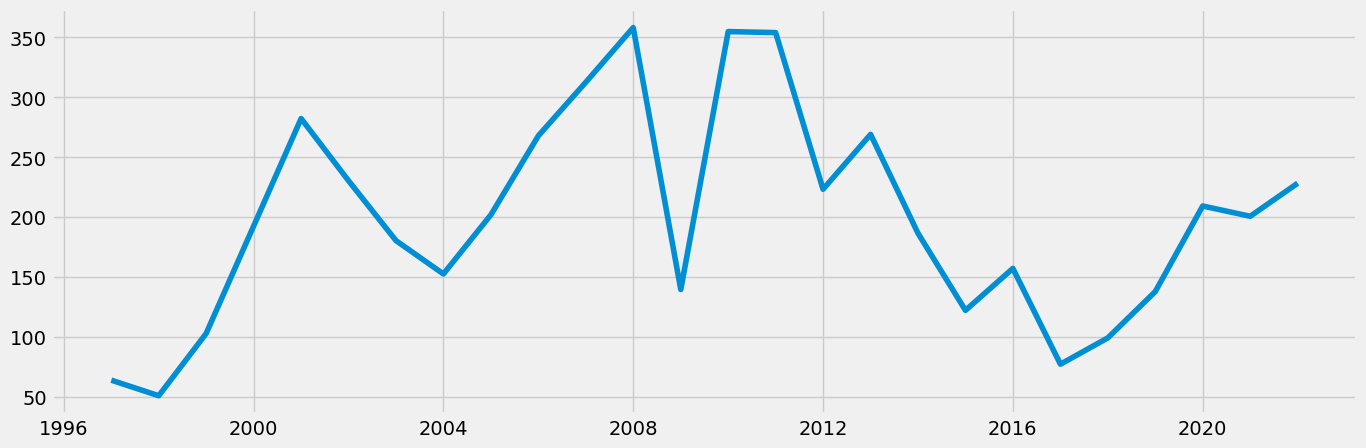

In [44]:
#Plot the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(LEO_group_year_Mass)

In [45]:
LEO_sub_filter.groupby(['Launch Year'])['Expected Lifetime (yrs.)'].mean()

Launch Year
1997    4.777778
1998    4.818182
1999    5.142857
2001    2.375000
2002    3.666667
2003    3.625000
2004    3.545455
2005    3.666667
2006    4.100000
2007    6.700000
2008    4.764706
2009    3.538462
2010    6.562500
2011    7.764706
2012    3.714286
2013    5.666667
2014    4.400000
2015    4.625000
2016    4.244681
2017    3.688525
2018    3.849490
2019    3.977979
2020    4.088381
2021    4.134027
2022    3.981598
Name: Expected Lifetime (yrs.), dtype: float64

In [46]:
#Assigned the output to a dataframe
LEO_group_year_Life = LEO_sub_filter.groupby(['Launch Year'])['Expected Lifetime (yrs.)'].mean()

In [47]:
LEO_group_year_Life.head(3)

Launch Year
1997    4.777778
1998    4.818182
1999    5.142857
Name: Expected Lifetime (yrs.), dtype: float64

In [48]:
LEO_group_year_Life.shape

(25,)

In [49]:
#Convert the result into a DataFrame
LEO_group_year_Life = pd.DataFrame({
    'Launch Year': LEO_group_year_Life.index,
    'Average Expected Lifetime (yrs.)': LEO_group_year_Life.values})

In [50]:
LEO_group_year_Life.head(5)

,Launch Year,Average Expected Lifetime (yrs.)
0,1997,4.777778
1,1998,4.818182
2,1999,5.142857
3,2001,2.375000
4,2002,3.666667


In [51]:
#Check for duplicates
LEO_group_year_Life.duplicated().sum()

0

In [52]:
#Check for missing values
LEO_group_year_Life.isnull().sum() 

Launch Year                         0
Average Expected Lifetime (yrs.)    0
dtype: int64

In [53]:
#Check the type of the dataframe
type(LEO_group_year_Life)

pandas.core.frame.DataFrame

In [54]:
#Check the datatype
LEO_group_year_Life['Launch Year'].dtype

dtype('int64')

In [55]:
#Set the --Launch Year column as DATE type
LEO_group_year_Life['Launch Year'] = pd.to_datetime(LEO_group_year_Life['Launch Year'], format='%Y')

In [56]:
LEO_group_year_Life.dtypes

Launch Year                         datetime64[ns]
Average Expected Lifetime (yrs.)           float64
dtype: object

In [57]:
#Set the --Launch Year column as the index
LEO_group_year_Life = LEO_group_year_Life.set_index('Launch Year')

In [58]:
LEO_group_year_Life.head(3)

,Average Expected Lifetime (yrs.)
Launch Year,
1997-01-01,4.777778
1998-01-01,4.818182
1999-01-01,5.142857


In [59]:
LEO_group_year_Life.shape

(25, 1)

In [60]:
LEO_group_year_Life.columns

Index(['Average Expected Lifetime (yrs.)'], dtype='object')

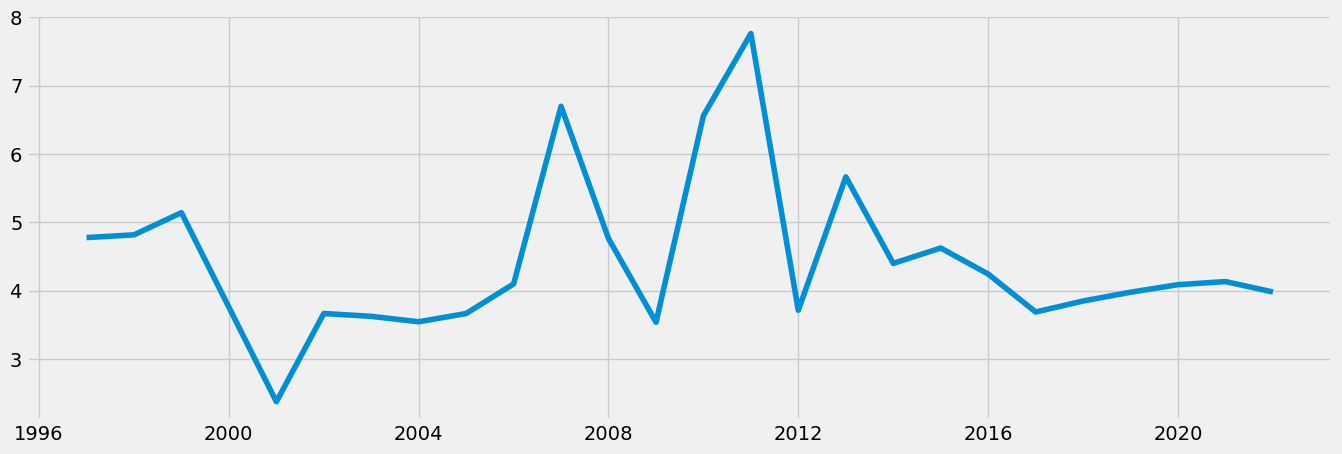

In [61]:
#Plot the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(LEO_group_year_Life)

## 04.2. GEO

In [63]:
#Check the dimensions  
df_GEO.shape

(472, 23)

In [64]:
#Check the data dataframe 
df_GEO.head(3)

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,...,Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month,Launch Mass Categories,Expected Lifetime Categories,Period Categories
13,2020-095A,"Advanced Orion 10 (Mentor, NRO L-44, USA 311)",United States of America,National Reconnaissance Office (NRO),United States of America,National Reconnaissance Laboratory (?),Military,Earth Observation,Electronic Intelligence,GEO,...,5400.0,NaN,NaN,Cape Canaveral,Delta 4 Heavy,2020,12,Heavy Weight Satellites,Long Expected Lifetime,Slow Rotation Period
14,1998-029A,"Advanced Orion 4 (Mentor, NROL 6, USA 139)",United States of America,National Reconnaissance Office (NRO),United States of America,TRW Space and Electronics,Military,Earth Observation,Electronic Intelligence,GEO,...,5200.0,NaN,NaN,Cape Canaveral,Titan IVA,1998,5,Heavy Weight Satellites,Long Expected Lifetime,Slow Rotation Period
15,2003-041A,"Advanced Orion 5 (Mentor, NROL 19, USA 171)",United States of America,National Reconnaissance Office (NRO),United States of America,TRW Space and Electronics,Military,Earth Observation,Electronic Intelligence,GEO,...,5200.0,NaN,NaN,Cape Canaveral,Titan IV,2003,9,Heavy Weight Satellites,Long Expected Lifetime,Slow Rotation Period


In [65]:
#Check for duplicates
df_GEO[df_GEO.duplicated()]

,ID Number COSPAR,Satellite Name,Country of Operator/Owner,Operator/Owner,Country of Contractor,Contractor,Users,Purpose,Detailed Purpose,Class of Orbit,...,Launch Mass (kg.),Dry Mass (kg.),Power (watts),Launch Site,Launch Vehicle,Launch Year,Launch Month,Launch Mass Categories,Expected Lifetime Categories,Period Categories


In [66]:
#Check for missing values
df_GEO.isnull().sum()

ID Number COSPAR                  0
Satellite Name                    0
Country of Operator/Owner         0
Operator/Owner                    0
Country of Contractor             0
Contractor                        0
Users                             0
Purpose                           0
Detailed Purpose                414
Class of Orbit                    0
Type of Orbit                   472
Period (minutes)                  0
Expected Lifetime (yrs.)          0
Launch Mass (kg.)                 0
Dry Mass (kg.)                  299
Power (watts)                   316
Launch Site                       0
Launch Vehicle                    0
Launch Year                       0
Launch Month                      0
Launch Mass Categories            0
Expected Lifetime Categories      0
Period Categories                 0
dtype: int64

In [67]:
df_GEO.shape

(472, 23)

In [68]:
#Create a dataframe with variables of interest 
Subset_GEO = df_GEO[['Launch Year', 'Launch Month','Launch Mass (kg.)', 'Expected Lifetime (yrs.)']]

# --df_GEO

In [69]:
Subset_GEO.shape

(472, 4)

In [70]:
Subset_GEO.dtypes

Launch Year                   int64
Launch Month                  int64
Launch Mass (kg.)           float64
Expected Lifetime (yrs.)    float64
dtype: object

In [71]:
Subset_GEO['Launch Year'].value_counts()

Launch Year
2016    32
2012    31
2018    28
2014    28
2015    27
2017    27
2011    25
2010    23
2021    22
2019    22
2013    21
2008    20
2009    20
2020    18
2022    17
2002    14
2000    13
2006    12
2023    10
2003    10
2007     9
2005     9
2001     7
1997     5
1998     4
2004     4
1995     3
1999     2
1996     2
1994     2
1993     2
1989     1
1988     1
1991     1
Name: count, dtype: int64

In [72]:
Subset_GEO['Launch Month'].value_counts()

Launch Month
12    53
8     53
10    46
6     41
9     38
3     38
11    37
4     35
7     35
5     33
1     33
2     30
Name: count, dtype: int64

In [73]:
#Check the dataframe
Subset_GEO.head(3)

,Launch Year,Launch Month,Launch Mass (kg.),Expected Lifetime (yrs.)
13,2020,12,5400.0,13.0
14,1998,5,5200.0,13.0
15,2003,9,5200.0,13.0


In [74]:
#Check for duplicates
Subset_GEO.duplicated().sum()

7

In [75]:
Subset_GEO.groupby(['Launch Year'])['Launch Mass (kg.)'].mean()

Launch Year
1988    3180.000000
1989    2310.000000
1991    3180.000000
1993    3190.000000
1994    6268.000000
1995    2512.000000
1996    5037.000000
1997    2725.000000
1998    3510.250000
1999    3844.000000
2000    3028.769231
2001    3762.857143
2002    3898.000000
2003    3237.800000
2004    3707.500000
2005    4404.444444
2006    4066.166667
2007    4196.777778
2008    4336.500000
2009    4311.600000
2010    4040.347826
2011    3969.360000
2012    4517.580645
2013    4512.142857
2014    3256.321429
2015    4457.074074
2016    4102.156250
2017    4614.592593
2018    4070.321429
2019    4285.545455
2020    3414.111111
2021    4159.045455
2022    3046.058824
2023    4147.700000
Name: Launch Mass (kg.), dtype: float64

In [76]:
#Assigned the output to a dataframe
GEO_group_year_Mass = Subset_GEO.groupby(['Launch Year'])['Launch Mass (kg.)'].mean()

In [77]:
GEO_group_year_Mass.head(3)

Launch Year
1988    3180.0
1989    2310.0
1991    3180.0
Name: Launch Mass (kg.), dtype: float64

In [78]:
GEO_group_year_Mass.shape

(34,)

In [79]:
#Convert the result into a DataFrame
GEO_group_year_Mass = pd.DataFrame({
    'Launch Year': GEO_group_year_Mass.index,
    'Average Launch Mass (kg.)': GEO_group_year_Mass.values})

In [80]:
#Check for duplicates
GEO_group_year_Mass.duplicated().sum()

0

In [81]:
#Check for missing values
GEO_group_year_Mass.isnull().sum() 

Launch Year                  0
Average Launch Mass (kg.)    0
dtype: int64

In [82]:
#Check the type of the dataframe
type(GEO_group_year_Mass)

pandas.core.frame.DataFrame

In [83]:
#Check the datatype
GEO_group_year_Mass['Launch Year'].dtype

dtype('int64')

In [84]:
#Set the --Launch Year column as DATE type
GEO_group_year_Mass['Launch Year'] = pd.to_datetime(GEO_group_year_Mass['Launch Year'], format='%Y')

In [85]:
GEO_group_year_Mass.dtypes

Launch Year                  datetime64[ns]
Average Launch Mass (kg.)           float64
dtype: object

In [86]:
#Set the --Launch Year column as the index
GEO_group_year_Mass = GEO_group_year_Mass.set_index('Launch Year')

In [87]:
GEO_group_year_Mass.head(3)

,Average Launch Mass (kg.)
Launch Year,
1988-01-01,3180.0
1989-01-01,2310.0
1991-01-01,3180.0


In [88]:
GEO_group_year_Mass.shape

(34, 1)

In [89]:
GEO_group_year_Mass.columns

Index(['Average Launch Mass (kg.)'], dtype='object')

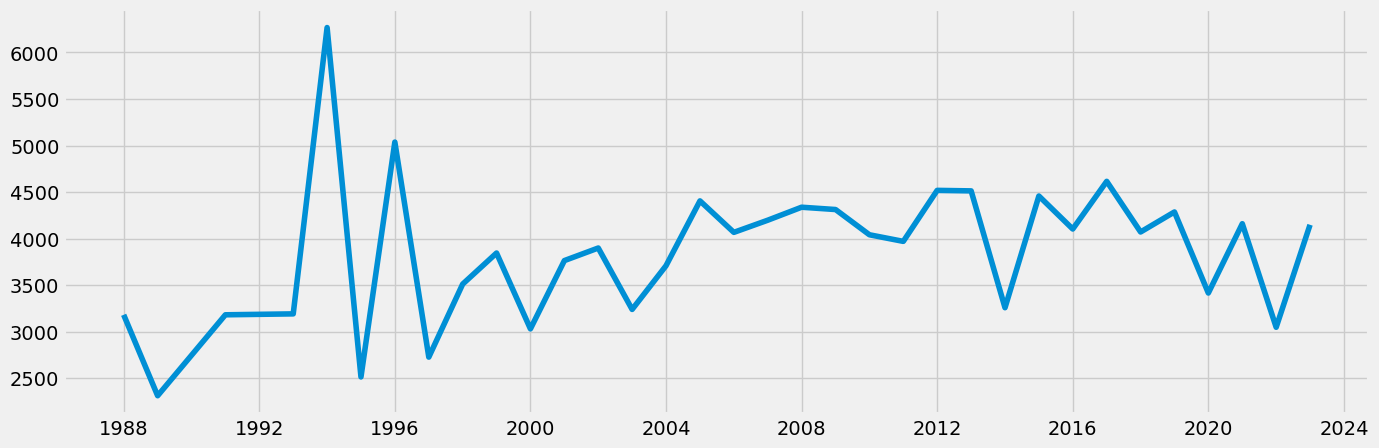

In [90]:
#Plot the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(GEO_group_year_Mass)

In [91]:
Subset_GEO.groupby(['Launch Year'])['Expected Lifetime (yrs.)'].mean()

Launch Year
1988    10.000000
1989     5.000000
1991    10.000000
1993    11.500000
1994    11.500000
1995     8.000000
1996    13.000000
1997    13.600000
1998    11.250000
1999     9.000000
2000    13.461538
2001    12.714286
2002    12.714286
2003    11.600000
2004    13.500000
2005    13.944444
2006    13.666667
2007    14.333333
2008    14.150000
2009    14.450000
2010    12.782609
2011    13.400000
2012    14.032258
2013    13.238095
2014    13.892857
2015    13.481481
2016    13.625000
2017    14.333333
2018    12.857143
2019    13.454545
2020    12.722222
2021    14.000000
2022    14.705882
2023    14.300000
Name: Expected Lifetime (yrs.), dtype: float64

In [92]:
#Assigned the output to a dataframe
GEO_group_year_Life = Subset_GEO.groupby(['Launch Year'])['Expected Lifetime (yrs.)'].mean()

In [93]:
GEO_group_year_Life.head(3)

Launch Year
1988    10.0
1989     5.0
1991    10.0
Name: Expected Lifetime (yrs.), dtype: float64

In [94]:
GEO_group_year_Life.shape

(34,)

In [95]:
#Convert the result into a DataFrame
GEO_group_year_Life = pd.DataFrame({
    'Launch Year': GEO_group_year_Life.index,
    'Average Expected Lifetime (yrs.)': GEO_group_year_Life.values})

In [96]:
#Check for duplicates
GEO_group_year_Life.duplicated().sum()

0

In [97]:
#Check for missing values
GEO_group_year_Life.isnull().sum() 

Launch Year                         0
Average Expected Lifetime (yrs.)    0
dtype: int64

In [98]:
#Check the type of the dataframe
type(GEO_group_year_Life)

pandas.core.frame.DataFrame

In [99]:
#Check the datatype
GEO_group_year_Life['Launch Year'].dtype

dtype('int64')

In [100]:
#Set the --Launch Year column as DATE type
GEO_group_year_Life['Launch Year'] = pd.to_datetime(GEO_group_year_Life['Launch Year'], format='%Y')

In [101]:
GEO_group_year_Life.dtypes

Launch Year                         datetime64[ns]
Average Expected Lifetime (yrs.)           float64
dtype: object

In [102]:
#Set the --Launch Year column as the index
GEO_group_year_Life = GEO_group_year_Life.set_index('Launch Year')

In [103]:
GEO_group_year_Life.head(3)

,Average Expected Lifetime (yrs.)
Launch Year,
1988-01-01,10.0
1989-01-01,5.0
1991-01-01,10.0


In [104]:
GEO_group_year_Life.shape

(34, 1)

In [105]:
GEO_group_year_Life.columns

Index(['Average Expected Lifetime (yrs.)'], dtype='object')

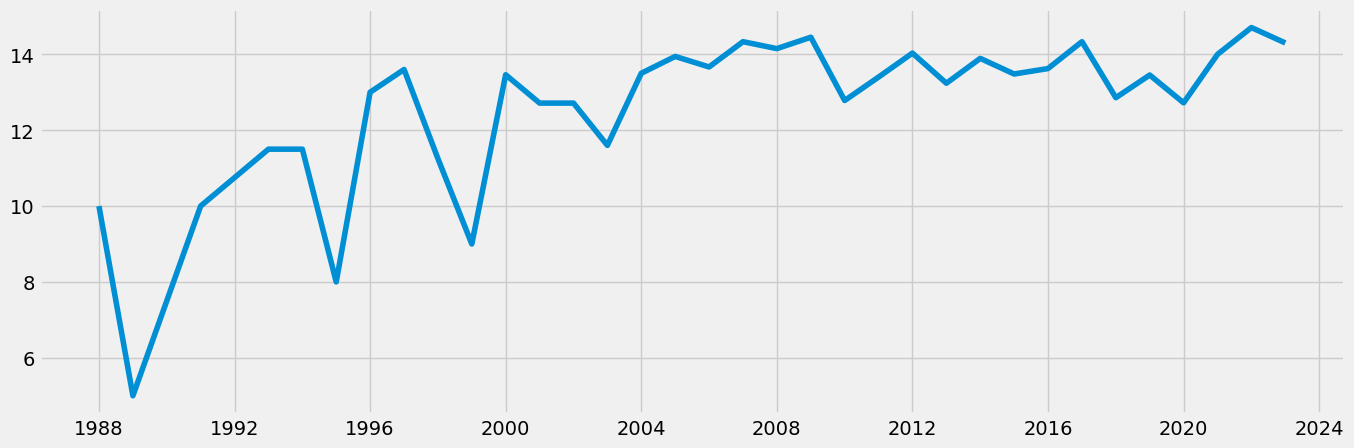

In [106]:
#Plot the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(GEO_group_year_Life)

# Observations

### LEO Satellites
+ The dataset includes launch years from 1997 to 2023. Prior to 1997, there are few data points, with only one from the 1980s and another from the early 1990s. Therefore, I've chosen to focus on satellites with consecutive records. 
+ Additionally, the technologies before 1997 differ significantly from those of the 21st century, especially in the last 10 years.

### GEO Satellites
+ The dataset includes launch years from 1988 to 2023. Since this dataset is smaller than the LEO dataset, I've decided to include all data points to reflect a continuous record of satellite launches over the years, except for 1990 and 1992.

## The time series plots display the average launch mass and average expected lifetime over the years for both LEO and GEO satellites.

# 05. Time Series Analysis - Decomposition

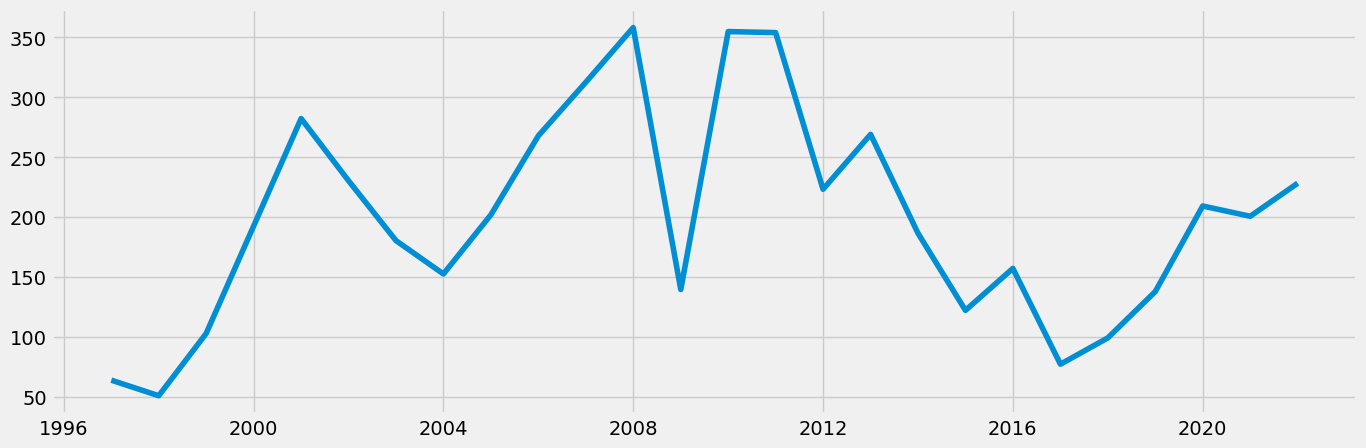

In [109]:
#Plot --LEO --year --Mass dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(LEO_group_year_Mass)

In [110]:
#Decompose the time series using an Multiplicative model
decomposition_LEO_Mass = sm.tsa.seasonal_decompose(LEO_group_year_Mass, model='multiplicative', period=1) #Annual

# --LEO -- MASS  Multiplicative

In [111]:
#Define a fixed size for the charts
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

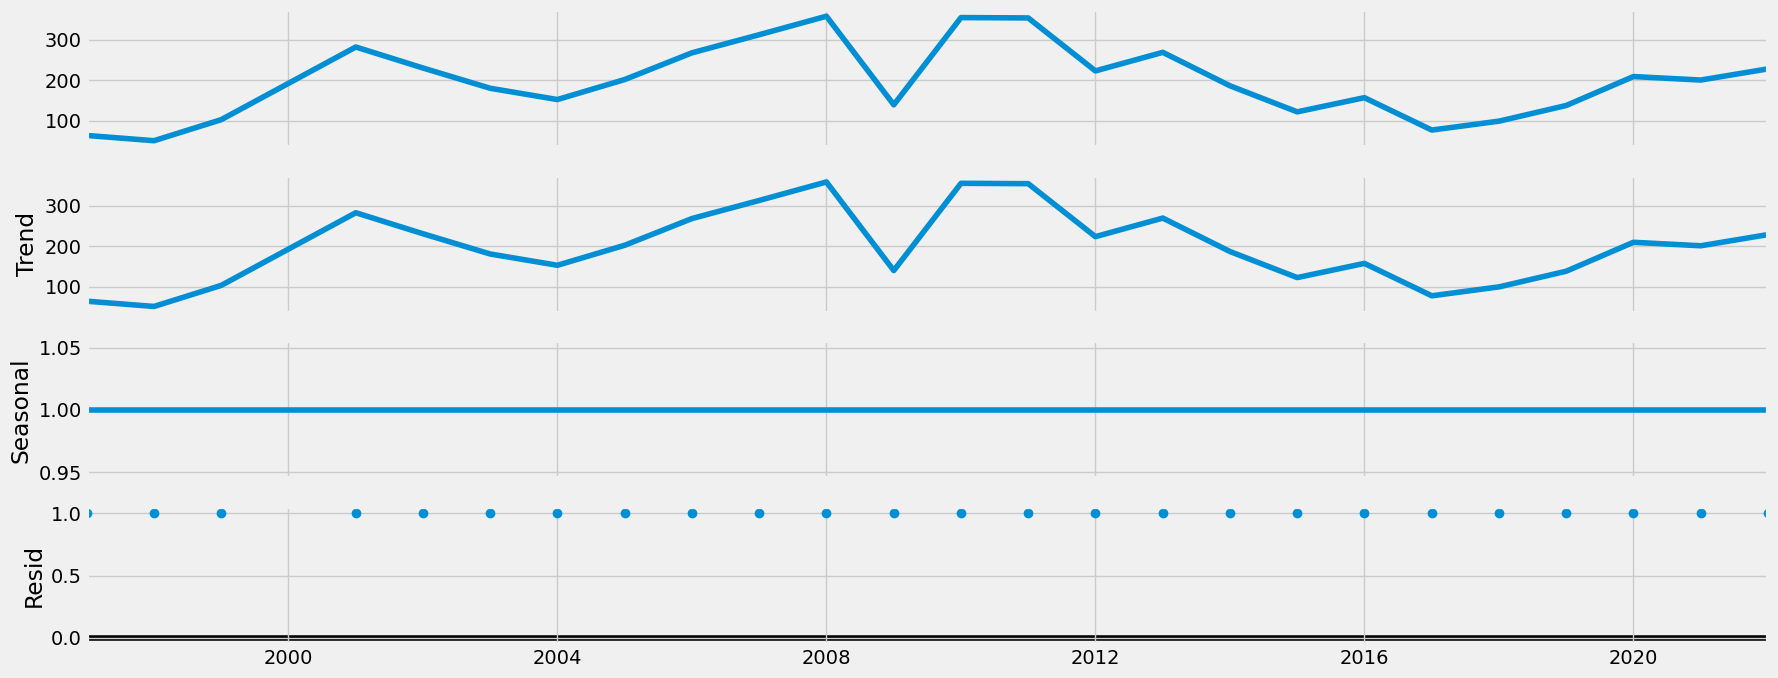

In [112]:
#Plot the separate time series components
decomposition_LEO_Mass.plot()
plt.show()

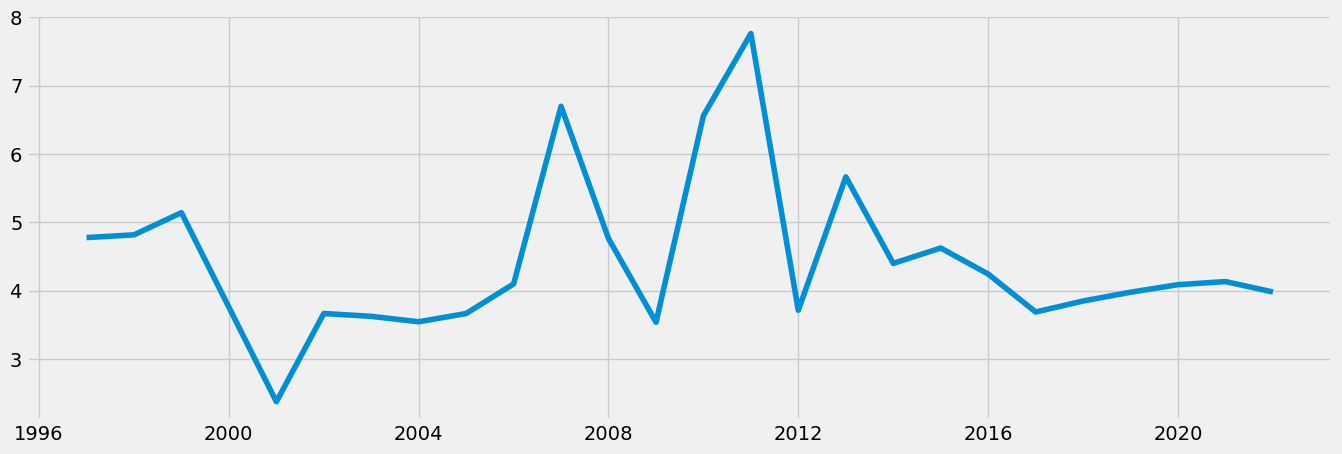

In [113]:
#Plot --LEO --year --Mass dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(LEO_group_year_Life)

In [114]:
#Decompose the time series using an Multiplicative model
decomposition_LEO_Life = sm.tsa.seasonal_decompose(LEO_group_year_Life, model='multiplicative', period=1) #Annual

# --LEO -- Life  Multiplicative

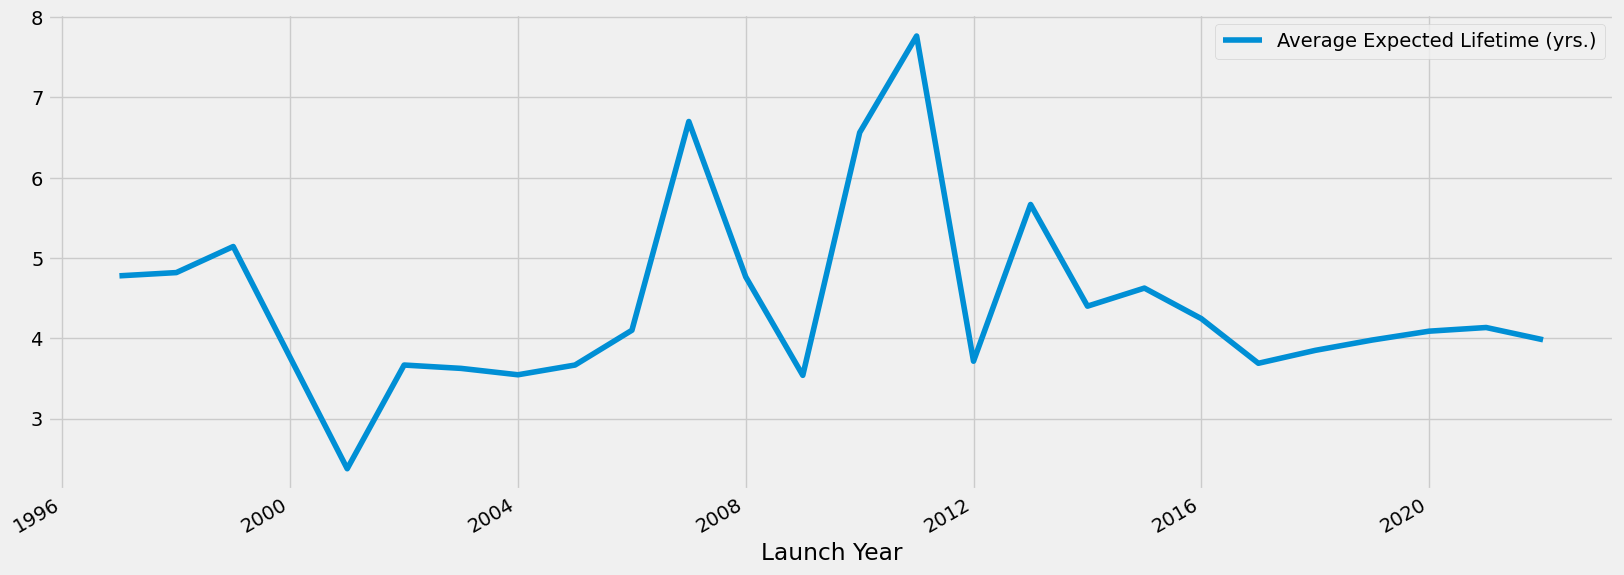

In [115]:
#Plot the separate time series components
LEO_group_year_Life.plot()
plt.show()

# 05.1. LEO Satellites - Observations

## LEO Launch MASS (Kg.)

### The Three Components:

#### The Trend:
+ The underlying trend aligns with the level-the original data, indicating that the data is smooth with minimal noise. If there were more noise, the trend might differ.
+ In the chart, there's a noticeable fluctuation with peaks and drops, that following a gradual increase and decrease in the average launch mass over the years.
+ In 2009, there was a significant drop in average launch mass, possibly due to a decrease in satellite launches, perhaps linked to the economic crisis.
+ Alternatively, the satellite industry might have been underperforming during some periods, which could account for the decline.
+ After 2009, there's been an increase and variation over the years, with a continuous rise in recent years.

#### The Seasonality:
+ The seasonal component is flat, suggesting that the data does not exhibit any seasonality.

#### The Noise:
+ The noise is what remains after removing the trend and seasonal components. Residuals represent any fluctuations not captured by the trend.
+ In this case, the residuals are represented by dots over time, indicating that there may be no remaining variations in the data left to explain.

  
## LEO Expected Lifetime (yrs.)
### There are no time series components; this could be due to the nature of the data.

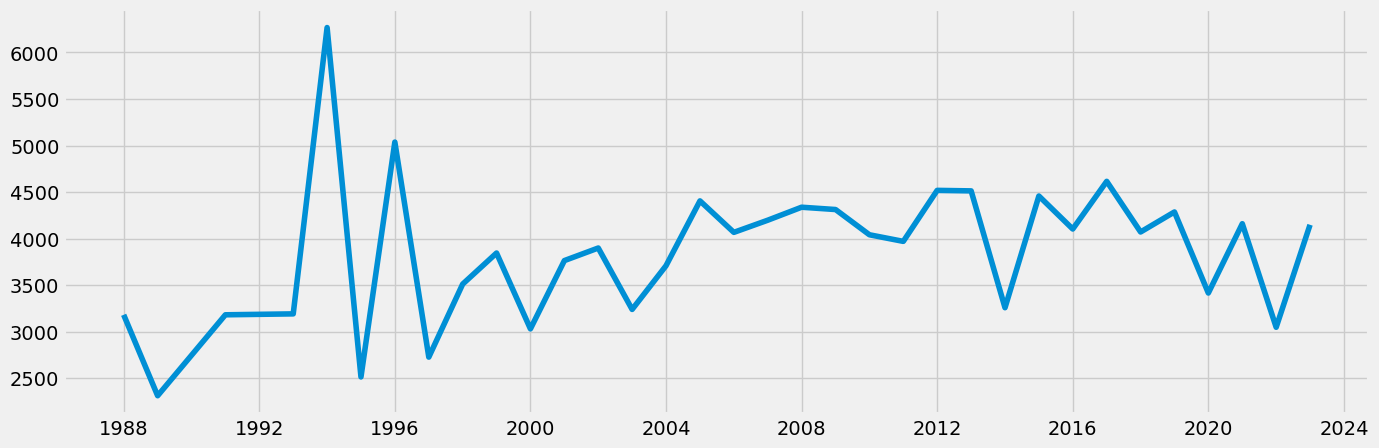

In [117]:
#Plot the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(GEO_group_year_Mass)

In [118]:
#Decompose the time series using an Multiplicative model
decomposition_GEO_Mass = sm.tsa.seasonal_decompose(GEO_group_year_Mass, model='multiplicative', period=1) #Annual

# --LEO -- MASS  Multiplicative

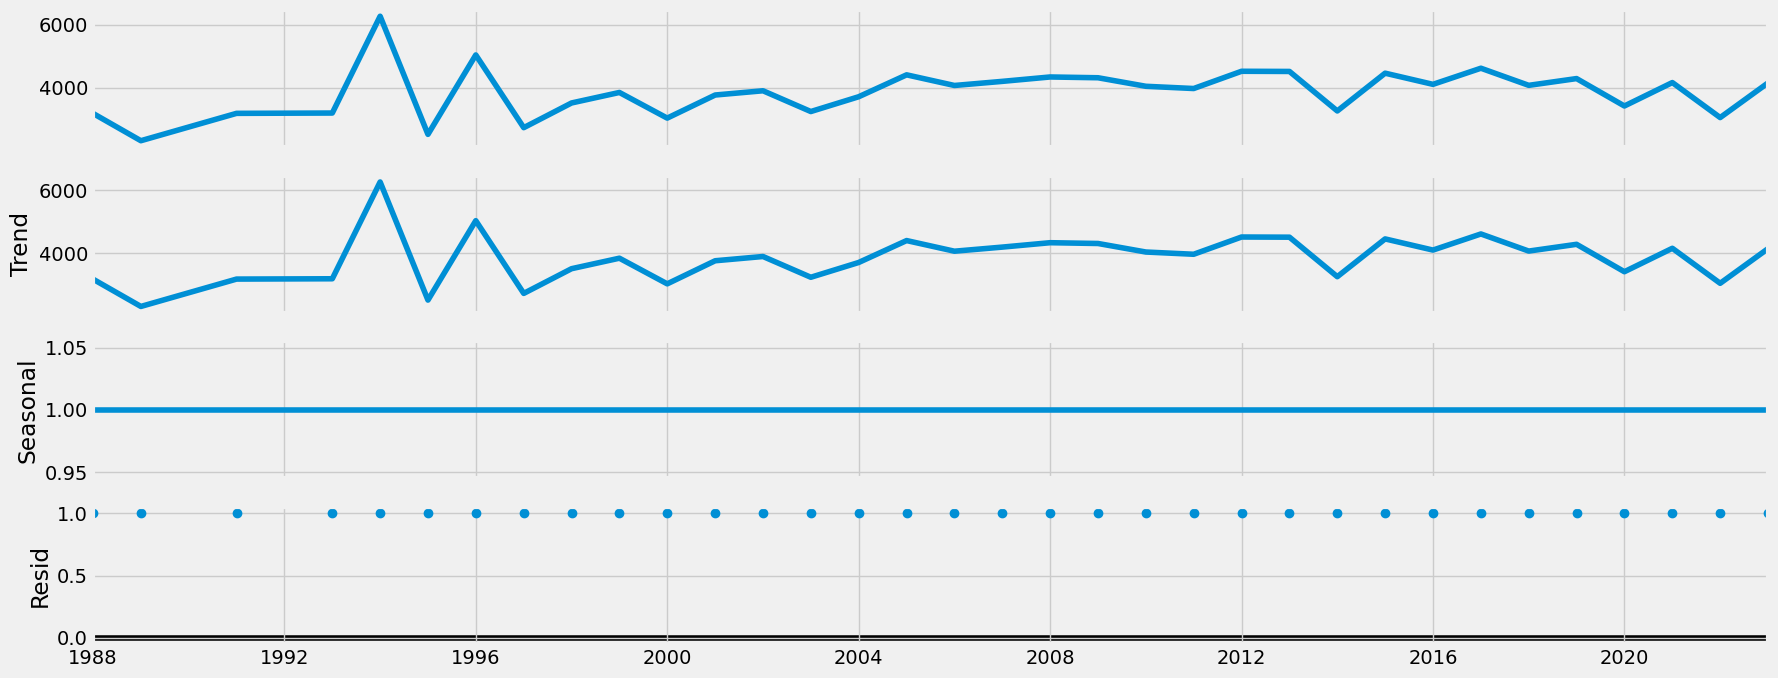

In [119]:
#Plot the separate time series components
decomposition_GEO_Mass.plot()
plt.show()

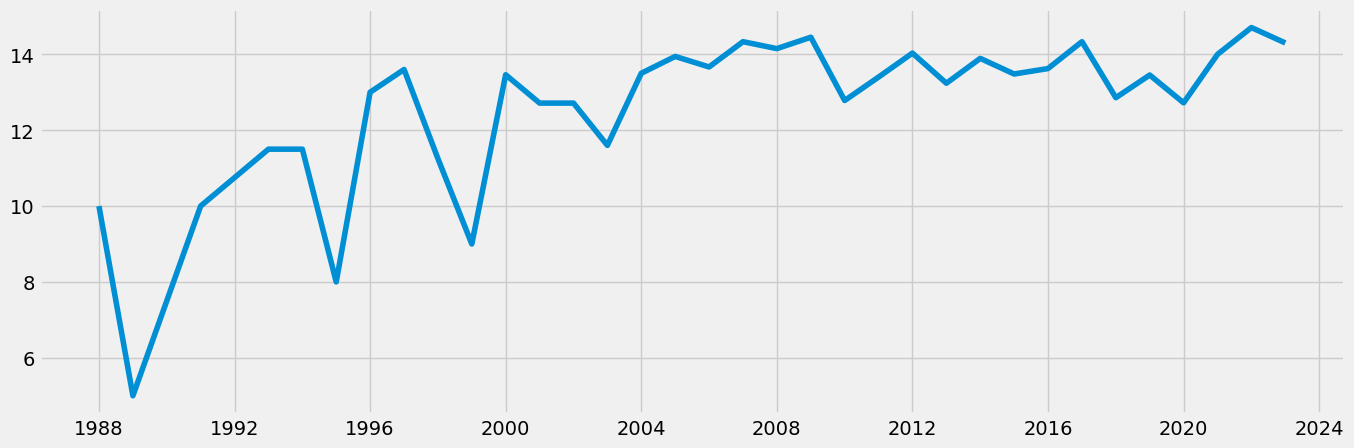

In [120]:
#Plot the new dataset
plt.figure(figsize=(15,5), dpi=100)
plt.plot(GEO_group_year_Life)

In [121]:
#Decompose the time series using an Additive model
decomposition_GEO_Life = sm.tsa.seasonal_decompose(GEO_group_year_Life, model='additive', period=1) #Annual

# --LEO -- Life  Additive

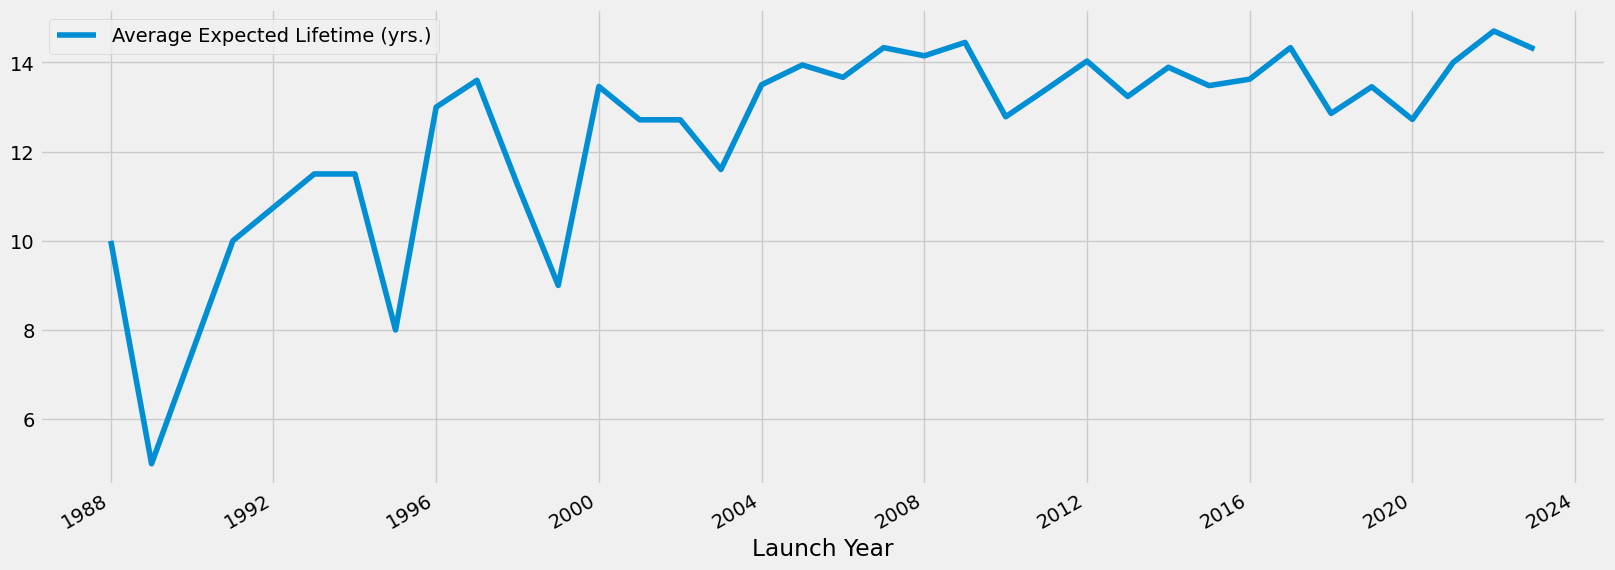

In [122]:
#Plot the separate time series components
GEO_group_year_Life.plot()
plt.show()

# 05.2. GEO Satellites - Observations

## GEO Launch MASS (Kg.)

### The Three Components:

#### The Trend:

+ The trend aligns with the level, indicating that the data is smooth with minimal noise. If there were more noise, the trend might differ.
+ In the chart, there's a noticeable fluctuation with peaks and drops, that following a gradual increase and decrease in the average launch mass over the years. 
+ In the mid-90s, there was a significant peak in the average launch mass, possibly due to an increase in satellite launches, perhaps linked to the success of these missions.
+ Alternatively, the satellite industry might have been performing well during this period, which could account for the peak. After 1996, there has been a steady momentum in the average launch mass that continues into recent years.

#### The Seasonality:
+ The seasonal component is flat, suggesting that the data does not exhibit any seasonality.

#### The Noise:
+ The noise is what remains after removing the trend and seasonal components. Residuals represent any fluctuations not captured by the trend.
+ In this case, the residuals are represented by dots over time, indicating that there may be no remaining variations in the data left to explain.

  
## GEO Expected Lifetime (yrs.)
+ There are no time series components; this could be due to the nature of the data.
+ There is an increase in the average launch mass over time. The sharp fluctuations in data points could be attributed to the small number of data points, especially for older dates up to around 2004.

# 06. Data Stationary Check

In [125]:
#Import the adfuller() function  (statsmodels)
from statsmodels.tsa.stattools import adfuller

In [126]:
#Define the function to print the output from the array
def dickey_fuller(timeseries):
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

In [127]:
# Apply the test using the function on the time series
dickey_fuller(LEO_group_year_Mass['Average Launch Mass (kg.)'])

# --LEO Mass  --LEO_group_year_Mass  --Average Expected Lifetime (yrs.)  --Average Launch Mass (kg.)


Dickey-Fuller Stationarity test:
Test Statistic                 -3.223280
p-value                         0.018676
Number of Lags Used             8.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [128]:
# Apply the test using the function on the time series
dickey_fuller(GEO_group_year_Mass['Average Launch Mass (kg.)'])

# --GEO Mass  --GEO_group_year_Mass --Average Launch Mass (kg.)

Dickey-Fuller Stationarity test:
Test Statistic                -7.129131e+00
p-value                        3.555454e-10
Number of Lags Used            0.000000e+00
Number of Observations Used    3.300000e+01
Critical Value (1%)           -3.646135e+00
Critical Value (5%)           -2.954127e+00
Critical Value (10%)          -2.615968e+00
dtype: float64


# Observations -  LEO and GEO Satellites

## Null Hypothesis (H0):
+ H0 = unit root
+ The null hypothesis is that there is a unit root in the data, indicating that the data is non-stationary. We aim to disprove this hypothesis.

## Alternative Hypothesis (Ha):
+ Ha ≠ unit root
+ The alternative hypothesis is that there is no unit root in the data.

### The p-value is significant, as it is < 0.05.

### The test statistic is also less than the critical values at both 5% and 10% significance levels.

### Therefore, we can reject the null hypothesis, suggesting that the data is more likely to be stationary.

---

# 07. Data Autocorrelations Check

In [131]:
#Import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

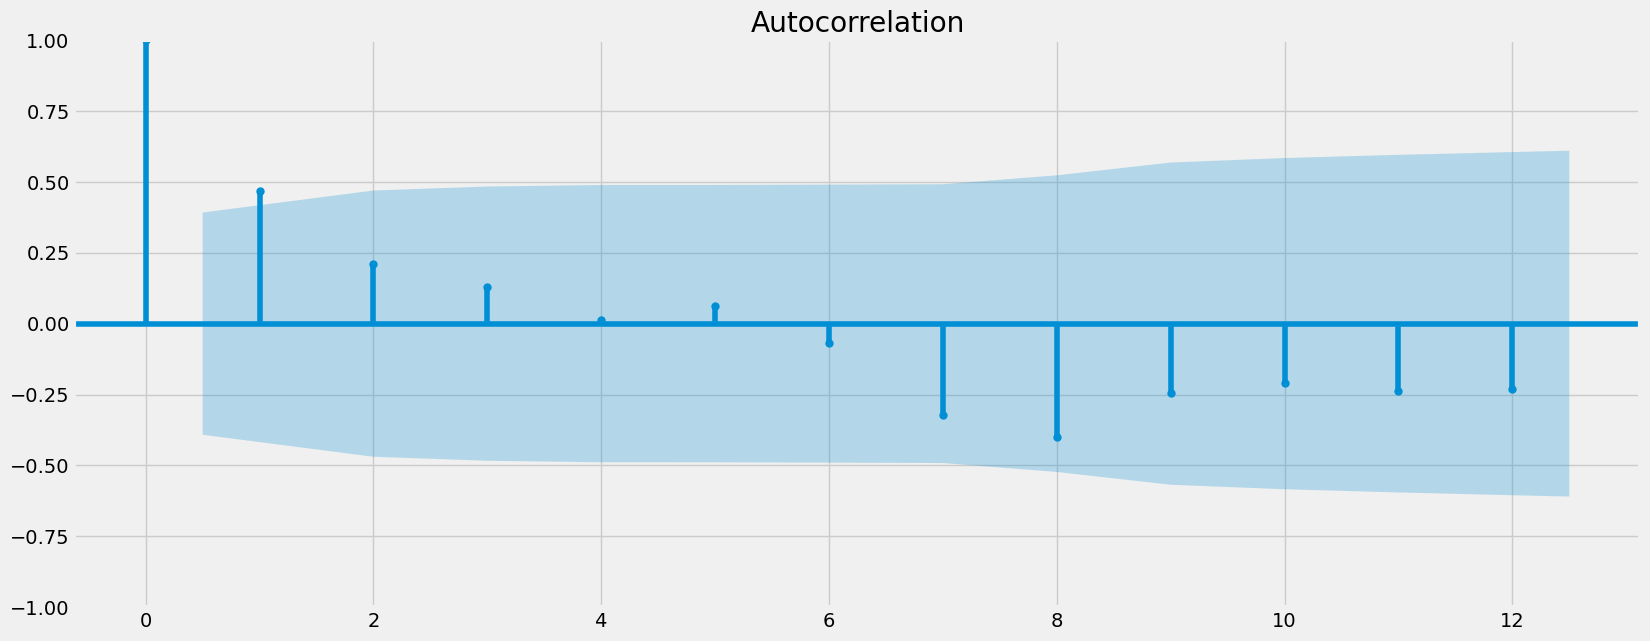

In [132]:
#Check Autocorrelations - plot
plot_acf(LEO_group_year_Mass)
plt.show()

# -- LEO Mass

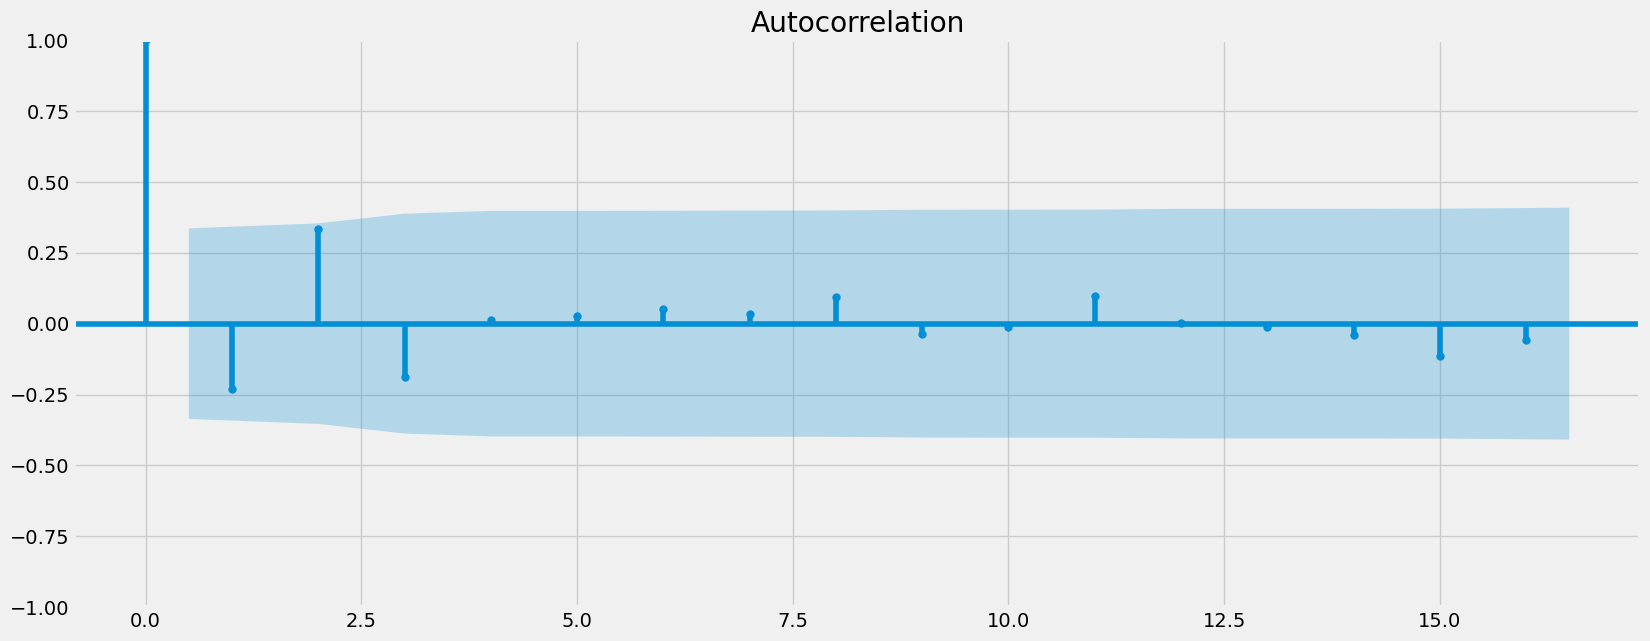

In [133]:
#Check Autocorrelations - plot
plot_acf(GEO_group_year_Mass)
plt.show()


# -- GEO Mass

# Observations -  LEO and GEO Satellites

#### The autocorrelation plot indicates that there aren't many lags correlated with each other in the data. Most data points fall within the confidence interval, suggesting that the data is stationary.

#### This supports the results from the Dickey-Fuller test.

#### Since we are confident that the data is stationary, we can proceed with forecasting using this stationary data.